In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
X_train = np.load("/content/drive/MyDrive/Data/X_tr_concat.npy")
y_train = np.load("/content/drive/MyDrive/Data/y_tr_concat.npy")


X_val = np.load("/content/drive/MyDrive/Data/X_val_concat.npy")
y_val = np.load("/content/drive/MyDrive/Data/y_val_concat.npy")

In [6]:
a = np.array([[1,2],[3,4],[5,6],[7,8]])
b = a[0:a.shape[0]//2, :]
print(b)

[[1 2]
 [3 4]]


In [18]:
X_valid = X_val[0:X_val.shape[0]//2,:]
X_test = X_val[X_val.shape[0]//2:,:]

y_valid = y_val[0:y_val.shape[0]//2,:]
y_test = y_val[y_val.shape[0]//2:,:]


In [19]:
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(1585000, 252) (1585000, 88) (251700, 252) (251700, 88) (251700, 252) (251700, 88)


In [20]:
features =252
batch_size = 512
numepochs = 50

In [21]:
def build_model():
  model = tf.keras.Sequential(
      [
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(256, activation="relu"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(128, activation="tanh"),
       tf.keras.layers.Dropout(0.3),
       tf.keras.layers.Dense(88, activation="sigmoid")
      ]
      )
  return model

In [24]:
model = build_model()

In [25]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss = "binary_crossentropy", metrics=['accuracy'])
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, mode='auto')
history = model.fit(X_train,y_train,epochs=numepochs,batch_size=batch_size,verbose=1,validation_data=(X_valid,y_valid), callbacks=stop)

Epoch 1/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.1119 - accuracy: 0.2232 - val_loss: 0.1096 - val_accuracy: 0.2584
Epoch 2/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0852 - accuracy: 0.2893 - val_loss: 0.1063 - val_accuracy: 0.2457
Epoch 3/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0799 - accuracy: 0.2950 - val_loss: 0.1057 - val_accuracy: 0.2529
Epoch 4/50
3096/3096 [==============================] - 12s 4ms/step - loss: 0.0773 - accuracy: 0.2975 - val_loss: 0.1043 - val_accuracy: 0.2603
Epoch 5/50
3096/3096 [==============================] - 11s 4ms/step - loss: 0.0756 - accuracy: 0.2992 - val_loss: 0.1057 - val_accuracy: 0.2556
Epoch 6/50
3096/3096 [==============================] - 11s 4ms/step - loss: 0.0744 - accuracy: 0.2999 - val_loss: 0.1046 - val_accuracy: 0.2639
Epoch 7/50
3096/3096 [==============================] - 11s 4ms/step - loss: 0.0736 - accuracy: 0.3002 - val_loss: 0.1035 - val_ac

In [30]:
def plot_history(history):

    fig, axs = plt.subplots()

    """# create the accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel("Epoch")
    axs[0].legend(loc ="lower right")
    axs[0].set_title("Accuracy eval")"""

    # create the error subplot
    axs.plot(history.history["loss"], label="train error")
    axs.plot(history.history["val_loss"], label="test error")
    axs.set_ylabel('Error')
    axs.set_xlabel("Epoch")
    axs.legend(loc="upper right")
    axs.set_title("Error eval")

    plt.show()

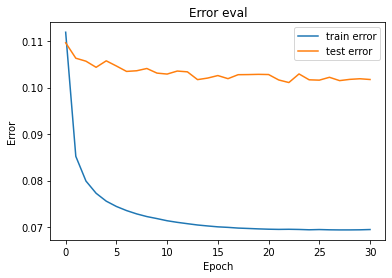

In [31]:
plot_history(history)

In [33]:
pred = model.predict(X_test)
print(pred.shape)

(251700, 88)


In [34]:
pred = pred>=0.5
pred = pred-0.0

In [35]:
true_positives = 0
false_positives = 0
false_negatives = 0

for j in range(pred.shape[0]):
  for k in range(pred.shape[1]):
    if y_test[j][k] == 1.0 and pred[j][k] == 1.0:
        true_positives+=1                                
    elif y_test[j][k] == 1.0 and pred[j][k] == 0.0:
        false_negatives+=1
    elif y_test[j][k] == 0.0 and pred[j][k] == 1.0:
        false_positives+=1
accuracy = (true_positives/(true_positives+false_positives+false_negatives))
precision = true_positives/(true_positives+false_positives)
recall = true_positives/(true_positives+false_negatives)
fscore = (2*precision*recall)/(precision+recall)


In [36]:
print(accuracy, precision, recall, fscore)

0.49406729653635023 0.7518150125868828 0.590353155968136 0.6613722121911524


In [37]:
model.save("dnn_trained.h5")